# Loading the Data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

df = pd.read_csv('D:\\AI\Machine Learning\\fraud-detection\\PS_20174392719_1491204439457_log.csv')
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_17240\1719216289.py:8: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\\AI\Machine Learning\\fraud-detection\\PS_20174392719_1491204439457_log.csv')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
df.rename(columns={'newbalanceOrig':'newbalanceOrg','nameOrig':'nameOrg'}, inplace=True)

# EDA

In [25]:
df.shape

(6362620, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrg         object 
 4   oldbalanceOrg   float64
 5   newbalanceOrg   float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [27]:
df.isna().sum()

step              0
type              0
amount            0
nameOrg           0
oldbalanceOrg     0
newbalanceOrg     0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [28]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [29]:
df.describe(include='O')

,type,nameOrg,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [30]:
# plt.figure(figsize=(14,8))
# sns.boxplot(data=df)
# plt.tight_layout()
# plt.show()


There is too much outliers in the Data but I will keep them

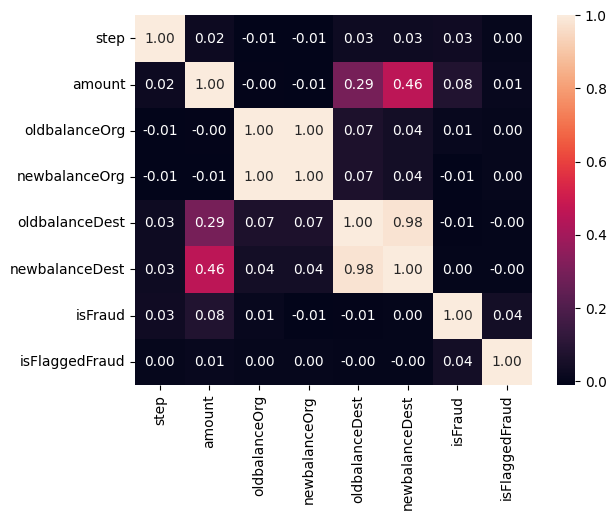

In [31]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

* There are multiple cols that is high correleated, I will combine them together

In [32]:
df['dest_delta_balance'] = df.newbalanceDest - df.oldbalanceDest

* oldbalanceOrg - amount = newbalanceOrg

In [33]:
df2 = df.drop(['isFlaggedFraud', 'newbalanceDest', 'oldbalanceDest', 'newbalanceOrg'], axis=1)
df2.head()

,step,type,amount,nameOrg,oldbalanceOrg,nameDest,isFraud,dest_delta_balance
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,1,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,1,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0,0.0


## Handling Categorical Data

In [34]:
n_rows = len(df2)
n_org = df2['nameOrg'].nunique()
n_dest = df2['nameDest'].nunique()
print("rows:", n_rows, "unique org:", n_org, "unique dest:", n_dest)
print("frac unique org:", n_org/n_rows, "frac unique dest:", n_dest/n_rows)

same_name_frac = (df2['nameOrg'] == df2['nameDest']).mean()
print("same in-row name fraction:", same_name_frac)


rows: 6362620 unique org: 6353307 unique dest: 2722362
frac unique org: 0.9985362947967975 frac unique dest: 0.4278680795018404
same in-row name fraction: 0.0


In [35]:
len(df2.type.unique())

5

* For the nameOrg, nameDest there is no relation among them so they may be an identifier. 
* For the type we can perform OHE

In [36]:
df3 = df2.drop(['nameOrg', 'nameDest'], axis=1)
df3.head()

,step,type,amount,oldbalanceOrg,isFraud,dest_delta_balance
0,1,PAYMENT,9839.64,170136.0,0,0.0
1,1,PAYMENT,1864.28,21249.0,0,0.0
2,1,TRANSFER,181.00,181.0,1,0.0
3,1,CASH_OUT,181.00,181.0,1,-21182.0
4,1,PAYMENT,11668.14,41554.0,0,0.0


# Data splitting

In [49]:
from sklearn.model_selection import train_test_split

x = df3.drop(columns='isFraud')
y = df3['isFraud']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

* Applying OHE and Normalize the data

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_cols = list(X_train.select_dtypes(include=[np.number]).columns)
cat_cols = ['type']

ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_cols),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
    ],
)

X_train_enc = ct.fit_transform(X_train)
X_test_enc  = ct.transform(X_test)

ohe = ct.named_transformers_['ohe']
ohe_feature_names = list(ohe.get_feature_names_out(cat_cols))

remainder_cols = [c for c in X_train.columns if c not in (num_cols + cat_cols)]

all_feature_names = list(num_cols) + ohe_feature_names + remainder_cols

X_train_pre = pd.DataFrame(X_train_enc, columns=all_feature_names, index=X_train.index)
X_test_pre  = pd.DataFrame(X_test_enc,  columns=all_feature_names, index=X_test.index)


# Imbalance handling

In [39]:
df_cls1 = y[y == 1]
df_cls0 = y[y == 0]

print(len(df_cls1))
print(len(df_cls0))

8213
6354407


* Undersampling

In [51]:
train_df = pd.concat([X_train_pre, y_train], axis=1)


cls1 = train_df[train_df['isFraud'] == 1]
cls0 = train_df[train_df['isFraud'] == 0]

cls0_under = cls0.sample(len(cls1), random_state=42)
train_under = pd.concat([cls0_under, cls1])


X_train_under = train_under.drop(columns='isFraud')
y_train_under = train_under['isFraud']

In [52]:
y_train_under.value_counts()

isFraud
0    4928
1    4928
Name: count, dtype: int64

* Oversampling with SMOTE

In [53]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res_np, y_res_np = adasyn.fit_resample(X_train_pre, y_train)

X_res = pd.DataFrame(X_res_np, columns=X_train_pre.columns)
y_res = pd.Series(y_res_np, name=y_train.name)

In [21]:
y_res.value_counts()

isFraud
1    5083812
0    5083526
Name: count, dtype: int64

# Modelling

* LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



# grid = GridSearchCV(LogisticRegression(penalty='l2',max_iter=5000, random_state=42),param_grid={'C' : [1,0.1, 0.001, 0.0001]},cv=3,scoring='roc_auc',n_jobs=-1)
# grid.fit(X_train_under,y_train_under)

clf_log = LogisticRegression(C=1, max_iter=5000, random_state=42)
clf_log.fit(X_res, y_res)


#y_pred = grid.best_estimator_.predict(X_test_pre)

y_pred = clf_log.predict(X_test_pre)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1270881
           1       0.01      1.00      0.02      1643

    accuracy                           0.86   1272524
   macro avg       0.50      0.93      0.47   1272524
weighted avg       1.00      0.86      0.92   1272524



In [23]:
from sklearn.ensemble import RandomForestClassifier


params = {
     'n_estimators': [200, 500],
     'max_depth': [None, 10, 20],
     'min_samples_split': [3, 5],
     'min_samples_leaf': [1, 2],
}

grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=True,random_state=42),param_grid= params,cv=3,scoring='roc_auc')
#grid.fit(X_train_under,y_train_under)

#print(grid.best_estimator_)
#print(grid.best_score_)

# clf_rf = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
#                         n_estimators=500, n_jobs=1, oob_score=True,
#                         random_state=42,verbose=2)

# clf_rf.fit(X_res,y_res)

# y_prob = clf_rf.predict_proba(X_test_pre)[:, 1]
# print("ROC AUC:", roc_auc_score(y_test, y_prob))

# print(clf_rf.score)

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

params = [
    {
        'kernel' : ['Linear'],
        'C' : [0.01, 0.1, 1]
    },
    {
        'kernel' : ['rbf'],
        'C' : [0.01, 0.1, 1],
        'gamma' : ["scale", "auto", 0.001, 0.01, 0.1, 1] 
    },
    {
        'kernel' : ['poly'],
        'C' : [0.01, 0.1, 1],
        'degree' : [2,3,4],
        'gamma' : ["scale", 0.01, 0.1, 1]
    },
]

grid = GridSearchCV(SVC(random_state=42),param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1,verbose=2)
grid.fit(X_train_under, y_train_under)

print(grid.best_estimator_)
print(grid.best_score_)

y_pred = grid.best_estimator_.predict(X_test_pre)

print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 57 candidates, totalling 171 fits


C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
9 fits failed out of a total of 171.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packa

SVC(C=1, degree=4, gamma=1, kernel='poly', random_state=42)
0.9838880896283785
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold


params = {
    'max_depth' : [3,5,7,10],
    'gamma' : [0, 0.1, 1],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
    'subsample' : [0.5, 0.6, 0.8,1]
}

#grid = GridSearchCV(XGBClassifier(tree_method='hist', n_estimators = 500), param_grid= params, cv = 3, scoring='roc_auc', n_jobs=1)

model  = XGBClassifier(tree_method='hist', n_estimators = 1000, gamma= 0.1, learning_rate= 0.1, max_depth= 5, subsample= 0.8, scale_pos_weight=1, max_delta_step=1)
#grid.fit(X_train_under,y_train_under)

model.fit(X_train_under, y_train_under)

y_pred = model.predict(X_test_pre)

#y_pred = grid.best_estimator_.predict(X_test_pre)

print(classification_report(y_test, y_pred))

# model = XGBClassifier(tree_method='hist', n_estimators = 1000, gamma= 0.1, learning_rate= 0.5, max_depth= 5, subsample= 1, n_jobs = 1)

# model.fit(X_res, y_res)
# y_prob = model.predict_proba(X_test_pre)[:, 1]
# roc_auc = roc_auc_score(y_test, y_prob)

# print(roc_auc)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.07      0.99      0.13      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.56   1272524
weighted avg       1.00      0.98      0.99   1272524



In [26]:
# y_pred = model.predict(X_test_pre)

# print(classification_report(y_test, y_pred))

## ROC accuracy 

* LogisticRegression with l2, C = 1 and undersampling: 94.24919321022405%

* LogisticRegression with l2, C = 1 and oversampling: 98.16511961895931%

* RandomForestClassifier with min_samples_leaf=2, min_samples_split=5, n_estimators=500, and undersampling: 99.8561887088815%

* RandomForestClassifier with oversampling taking too much time and still there is no result but I assume it will reach 100%

* Support Vector Classifier with C=1, degree=4, gamma=1, kernel='poly', random_state=42 and undersampling: 98.38880896283785%

* XGBClassifier with 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 5, 'subsample': 1 and undersampling: 99.87323380802456%

* XGBClassifier with 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 5, 'subsample': 1 and oversampling: 99.88140738364912%


## Deep Learning 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import AUC

input_dim = X_train_under.shape[1]
# print(input_dim)

model = Sequential([
    Dense(128,activation='relu',input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(8,activation='relu'),
    BatchNormalization(),

    Dense(1,activation='sigmoid')
])

model.compile(optimizer = Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])

In [55]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.fit(X_train_under,y_train_under,validation_split=0.2,epochs=200,batch_size=64,callbacks=[early_stopping],verbose=1)

Epoch 1/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6483 - auc: 0.6894 - loss: 0.7047 - val_accuracy: 0.6410 - val_auc: 0.0000e+00 - val_loss: 0.6511
Epoch 2/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7378 - auc: 0.8022 - loss: 0.5508 - val_accuracy: 0.6471 - val_auc: 0.0000e+00 - val_loss: 0.5519
Epoch 3/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7722 - auc: 0.8474 - loss: 0.4829 - val_accuracy: 0.7652 - val_auc: 0.0000e+00 - val_loss: 0.4395
Epoch 4/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8033 - auc: 0.8773 - loss: 0.4383 - val_accuracy: 0.8174 - val_auc: 0.0000e+00 - val_loss: 0.4120
Epoch 5/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8208 - auc: 0.8888 - loss: 0.4169 - val_accuracy: 0.8281 - val_auc: 0.0000e+00 - val_loss: 0.3856
Epoch 6/200
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8328 - auc: 0.8995 - loss: 0.3993 - val_accuracy: 0.8301 - val_auc: 0.0000e+00 - val_loss: 0.3820
Epoch 7/2

In [56]:
y_pred_proba = model.predict(X_test_pre)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred))

79533/79533 ━━━━━━━━━━━━━━━━━━━━ 130s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   2541763
           1       0.05      0.91      0.09      3285

    accuracy                           0.98   2545048
   macro avg       0.52      0.95      0.54   2545048
weighted avg       1.00      0.98      0.99   2545048



In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_res,y_res,validation_split=0.3,epochs=10,batch_size=512,callbacks=[early_stopping],verbose=1)

Epoch 1/10
10426/10426 ━━━━━━━━━━━━━━━━━━━━ 95s 9ms/step - accuracy: 0.9781 - auc: 0.9957 - loss: 0.0656 - val_accuracy: 0.8820 - val_auc: 0.0000e+00 - val_loss: 0.2952
Epoch 2/10
10426/10426 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - accuracy: 0.9820 - auc: 0.9966 - loss: 0.0552 - val_accuracy: 0.9549 - val_auc: 0.0000e+00 - val_loss: 0.1728
Epoch 3/10
10426/10426 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.9835 - auc: 0.9971 - loss: 0.0508 - val_accuracy: 0.8753 - val_auc: 0.0000e+00 - val_loss: 0.3231
Epoch 4/10
10426/10426 ━━━━━━━━━━━━━━━━━━━━ 89s 8ms/step - accuracy: 0.9845 - auc: 0.9974 - loss: 0.0480 - val_accuracy: 0.5630 - val_auc: 0.0000e+00 - val_loss: 0.7943
Epoch 5/10
10426/10426 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.9852 - auc: 0.9976 - loss: 0.0457 - val_accuracy: 0.9266 - val_auc: 0.0000e+00 - val_loss: 0.2276
Epoch 6/10
10426/10426 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.9858 - auc: 0.9977 - loss: 0.0437 - val_accuracy: 0.9616 - val_auc: 0.0000e+00 - val

In [63]:
y_pred_proba = model.predict(X_test_pre)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred))

79533/79533 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   2541763
           1       0.15      0.99      0.26      3285

    accuracy                           0.99   2545048
   macro avg       0.57      0.99      0.63   2545048
weighted avg       1.00      0.99      1.00   2545048

